In [52]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import plotly.express as px
import math

In [16]:
df = pd.read_fwf("C:\\Users\\brije\\Downloads\\Jupyter Notes\\Simulation Lab\\places_colorado.txt",names=['Code','Lat','Lon','Location'])

In [26]:
df['Lon']=df['Lon']*-1

In [28]:
df

,Code,Lat,Lon,Location
0,[AFF],39.52,-105.35,"Air Force A,CO"
1,[AKO],40.17,-103.22,"Akron,CO"
2,[ALS],37.45,-105.87,"Alamosa,CO"
3,[ASE],39.22,-106.87,"Aspen,CO"
4,[BJC],39.90,-105.12,"Brmfield/Jef,CO"
5,[BKF],39.72,-104.75,"Buckley,CO"
6,[COS],38.82,-104.72,"Colo Sprgs,CO"
7,[CEZ],37.30,-108.63,"Cortez,CO"
8,[CAG],40.50,-107.53,"Craig-Moffat,CO"
9,[DEN],39.75,-104.87,"Denver,CO"


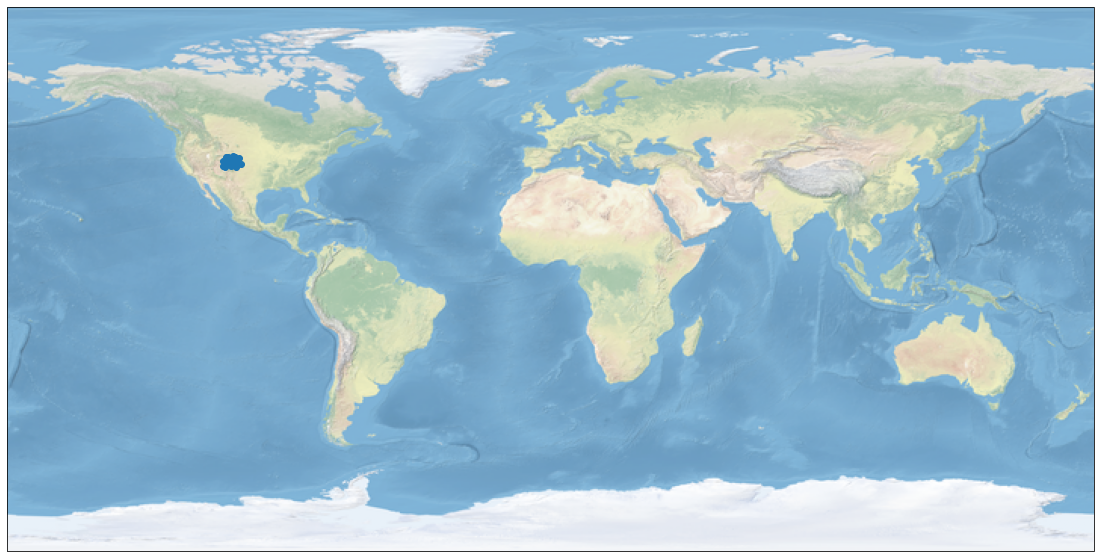

In [31]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1, 1), (0, 0), projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.scatter(df["Lon"],df["Lat"])
plt.show()

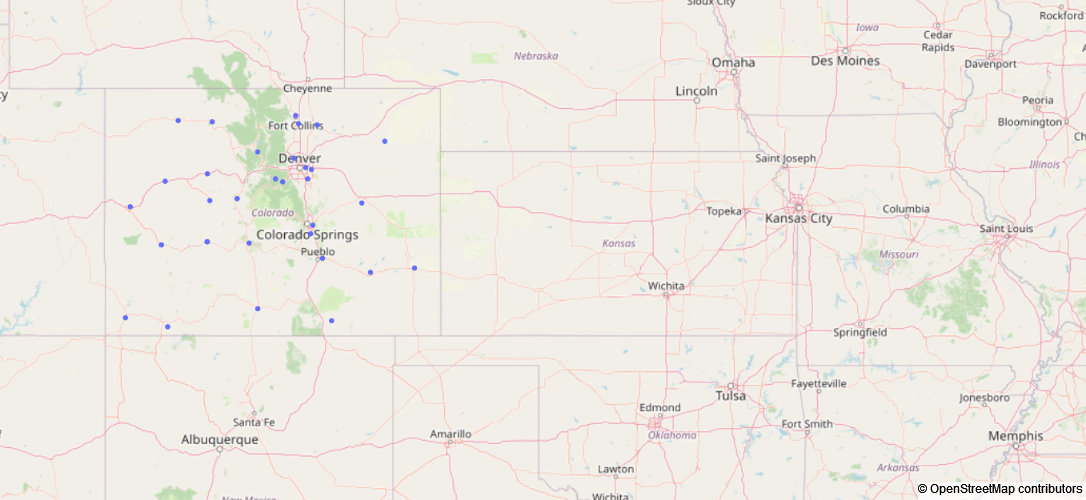

In [42]:
fig=px.scatter_mapbox(data_frame=df,lat='Lat',lon='Lon',hover_name='Location',zoom=3, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [43]:
import netCDF4

In [44]:
f = netCDF4.Dataset('C:\\Users\\brije\\Downloads\\Jupyter Notes\\Simulation Lab\\initial_state.nc')

In [46]:
f.variables.keys()

dict_keys(['refZMid', 'normalVelocity', 'layerThickness', 'restingThickness', 'seaIcePressure', 'atmosphericPressure', 'boundaryLayerDepth', 'refBottomDepth', 'bottomDepth', 'bottomDepthObserved', 'oceanFracObserved', 'maxLevelCell', 'vertCoordMovementWeights', 'edgeMask', 'ssh', 'modifySSHMask', 'rx1Cell', 'rx1Edge', 'rx1MaxCell', 'rx1MaxEdge', 'globalRx1Max', 'density', 'rx1InitSmoothingMask', 'verticalStretch', 'windStressZonal', 'windStressMeridional', 'temperature', 'salinity', 'latCell', 'lonCell', 'xCell', 'yCell', 'zCell', 'indexToCellID', 'latEdge', 'lonEdge', 'xEdge', 'yEdge', 'zEdge', 'indexToEdgeID', 'latVertex', 'lonVertex', 'xVertex', 'yVertex', 'zVertex', 'indexToVertexID', 'meshDensity', 'cellsOnEdge', 'nEdgesOnCell', 'nEdgesOnEdge', 'edgesOnCell', 'edgesOnEdge', 'weightsOnEdge', 'dvEdge', 'dcEdge', 'angleEdge', 'areaCell', 'areaTriangle', 'cellsOnCell', 'verticesOnCell', 'verticesOnEdge', 'edgesOnVertex', 'cellsOnVertex', 'kiteAreasOnVertex', 'fEdge', 'fVertex', 'fCell

In [48]:
lat=f.variables['latCell']
lon=f.variables['lonCell']

In [50]:
print(f'Minimum longitude is {np.min(lon[:])} and Maximum longitude is {np.max(lon[:])}')
print(f'Minimum latitude is {np.min(lat[:])} and Maximum latitude is {np.max(lat[:])}')

Minimum longitude is 1.2741902479678813e-05 and Maximum longitude is 6.283144683697686
Minimum latitude is -1.3706523385167202 and Maximum latitude is 1.5698296395541094


In [56]:
print(f'Minimum longitude is {math.degrees(np.min(lon[:]))} deg and Maximum longitude is {math.degrees(np.max(lon[:]))} deg')
print(f'Minimum latitude is {math.degrees(np.min(lat[:]))} deg and Maximum latitude is {math.degrees(np.max(lat[:]))} deg')

Minimum longitude is 0.0007300572350528742 deg and Maximum longitude is 359.997672445938 deg
Minimum latitude is -78.53259417674468 deg and Maximum latitude is 89.94461290099375 deg


In [64]:
print(lat.shape)
print(lon.shape)
ncells=lat.shape
lat_array=np.zeros(ncells)
lon_array=np.zeros(ncells)
lat_array[:]=lat[:]
lon_array[:]=lon[:]
lat_array[:]=lat_array[:]*180/np.pi
lon_array[:]=lon_array[:]*180/np.pi
print('Maximum Longitude:',np.max(lon_array),'Minimum Longitude:',np.min(lon_array))
print('Maximum Latitude:',np.max(lat_array),'Minimum Latitude:',np.min(lat_array))

print(f.variables['layerThickness'].shape)

(236853,)
(236853,)
Maximum Longitude: 359.997672445938 Minimum Longitude: 0.0007300572350528742
Maximum Latitude: 89.94461290099375 Minimum Latitude: -78.53259417674468
(1, 236853, 1)


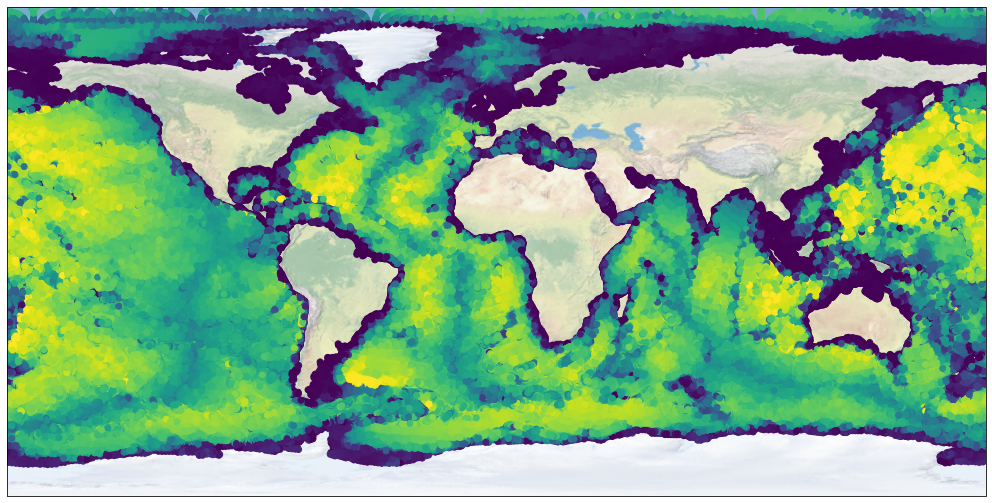

In [65]:
plt.figure(figsize=(20,9))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.scatter(lon_array[:],lat_array[:],c=f.variables['layerThickness'][0,:])

plt.show()